In [1]:
# Estas são as bibliotecas mais comumente importadas.
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# O trecho de código abaixo coloca a minha pasta de scripts no caminhos de arquivos que o python importa. Ou seja, com o código abaixo consigo importar códigos que eu criei
import sys
sys.path.append("D:\\petroanalisedados-master\\petroanalisedados-master\\script")
sys.path.append("script")
sys.path

['F:\\Workspace\\CursoPython',
 'C:\\Users\\alex_\\Anaconda3\\python37.zip',
 'C:\\Users\\alex_\\Anaconda3\\DLLs',
 'C:\\Users\\alex_\\Anaconda3\\lib',
 'C:\\Users\\alex_\\Anaconda3',
 '',
 'C:\\Users\\alex_\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\alex_\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\alex_\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\alex_\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\alex_\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\alex_\\.ipython',
 'D:\\petroanalisedados-master\\petroanalisedados-master\\script',
 'script']

### Um breve resumo sobre pacotes importantes no processamento científico

Vamos testar alguma funcionalidades de pacotes importantes.

* numpy <a href='https://numpy.org'>https://numpy.org</a>
* pandas <a href='https://pandas.pydata.org/'>https://pandas.pydata.org</a>
* matpllotlib <a href='https://matplotlib.org/'>https://matplotlib.org</a>

Sumário

* [numpy](#sec_numpy)
* [pandas](#sec_pandas)
* [matplotlib](#sec_matplot)


## <a id='sec_numpy'>numpy</a>

#### Motivação para o numpy
Abaixo uma motivação sobre a necessidade da biblioteca numpy para efetuarmos cáculos numéricos.

A ideia é perceber que as listas não são um bom substituto para vetores e matrizes porque elas não conseguem efetuar as operações matriciais de maneira nativa

In [2]:
a = list(range(5))
a

[0, 1, 2, 3, 4]

In [3]:
b = list(range(0, 10, 2))
b

[0, 2, 4, 6, 8]

In [4]:
# A soma de lista não produz um resultado parecido com a soma de vetores
a + b

[0, 1, 2, 3, 4, 0, 2, 4, 6, 8]

In [5]:
# Quando tentamos realizar a operação de soma de vetores com o numpy o resultado é como o esperado.
a = np.array(a, dtype=int)
b = np.array(b, dtype=float)

a + b

array([ 0.,  3.,  6.,  9., 12.])

Outras funcionalidades do NUMPY

In [6]:
a.shape

(5,)

In [7]:
a.ndim

1

##### E para o produto de matrizes? como realizar?

In [8]:
# A função np.eye é interessante para criarmos uma matriz identidade
i = np.eye(2)
print('O tipo de dados deste dataframe é: {}'.format(i.dtype))
print('O formato desta matriz é: {}'.format(i.shape))
i

O tipo de dados deste dataframe é: float64
O formato desta matriz é: (2, 2)


array([[1., 0.],
       [0., 1.]])

In [9]:
# a função np.full é uma boa funcionalidade quando queremos criar um dataframe de dados iguais
b = np.full((2,2), 2)
print('O tipo de dados deste dataframe é: {}'.format(b.dtype))
print('O formato desta matriz é: {}'.format(b.shape))
b


O tipo de dados deste dataframe é: int32
O formato desta matriz é: (2, 2)


array([[2, 2],
       [2, 2]])

In [10]:
# Vamos modificar o valor de um elemento de i
i[1, 0] = 2
i

array([[1., 0.],
       [2., 1.]])

#### Multiplicação de matrizes

Vamos verificar como é realizada a multiplicação de matrizes. O objetivo é conseguir realizar uma multiplicação como a descrita abaixo:

$$\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix}
\times
\begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}
\end{bmatrix}
=
\begin{bmatrix}
a_{11}b_{11} + a_{12}b_{21} & a_{11}b_{12} + a_{12}b_{22}\\
a_{21}b_{11} + a_{22}b_{21} & a_{21}b_{12} + a_{22}b_{22}\\
\end{bmatrix}
$$

In [11]:
# O resultado não é uma multiplicação de matrizes
i * b

array([[2., 0.],
       [4., 2.]])

In [12]:
# Aqui eu consegui um produto de matrizes
i.dot(b)

array([[2., 2.],
       [6., 6.]])

### <a id='sec_pandas'>Sobre o pandas</a>

o nosso goal é utilizarmos a função que criamos e salvamos em um pasta chamada scripts para lermos o arquivos de dados e posteriormente plotarmos as principais características dos dados.

Passos lógicos:
1. Ler o arquivo
2. Criar um pandas daframe com estes arquivos
3. plotar as principais características.


In [13]:
# Verificando se a pasta scripts está no path
print('Abaixo a lista de diretórios no path:')
for diretorio in sys.path:
    print('\t {}'.format(diretorio))

Abaixo a lista de diretórios no path:
	 F:\Workspace\CursoPython
	 C:\Users\alex_\Anaconda3\python37.zip
	 C:\Users\alex_\Anaconda3\DLLs
	 C:\Users\alex_\Anaconda3\lib
	 C:\Users\alex_\Anaconda3
	 
	 C:\Users\alex_\Anaconda3\lib\site-packages
	 C:\Users\alex_\Anaconda3\lib\site-packages\win32
	 C:\Users\alex_\Anaconda3\lib\site-packages\win32\lib
	 C:\Users\alex_\Anaconda3\lib\site-packages\Pythonwin
	 C:\Users\alex_\Anaconda3\lib\site-packages\IPython\extensions
	 C:\Users\alex_\.ipython
	 D:\petroanalisedados-master\petroanalisedados-master\script
	 script


In [14]:
# importando a minha funçao e lendo o arquivo
from leitor_arq import *
vendas = ler_arquivo('Dados/vendas_.csv')
vendas.keys()

dict_keys(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'])

In [15]:
# transformando o dicionário da regiao 'regiao' em um dataframe
regiao = 'CENTRO OESTE'

vendas = ler_arquivo('Dados/vendas_.csv')
df = pd.DataFrame(vendas[regiao])

#Eu preciso transformar o meu dataframe para possuir somente tipos numéricos e não 'object'.
df.dtypes



CENTRO OESTE    object
NORDESTE        object
NORTE           object
SUDESTE         object
SUL             object
dtype: object

In [16]:
# A função abaixo devolve um dataframe como o anterior porém com colunas numéricas, porém as colunas precisam ser "transformáveis", caso contrário receberei um erro.
# df.astype(float)

In [17]:
# Abaixo segue um método de tratar os meus dados para tornar o meu dataframe para colunas numéricas

def sub(x):
    try:
        if not x.replace('.', '').isnumeric() :
            return np.nan
        return x
    except AttributeError:
        return x
    finally:
        return x

for x in df.columns:
    df[x] = df[x].apply(sub)
    
# df = df.astype(float)

print(df.dtypes)

df.head()

CENTRO OESTE    object
NORDESTE        object
NORTE           object
SUDESTE         object
SUL             object
dtype: object


,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
0,61.979,28.821,38.556,42.797,281
1,66.918,23.281,36.426,41.823,
2,70.762,38.553,35.293,48.488,2.751
3,68.578,36.371,33.101,55.317,2.103
4,67.648,25.463,29.327,54.847,1.641


In [18]:
# Uma abordagem mais inteligente. Obrigado ao colega que apresentou a possibilidade na aula.
for c in df.columns:
    df[c] = pd.to_numeric(df[c])

df = df.astype(float)

print(df.dtypes)
df.head()


CENTRO OESTE    float64
NORDESTE        float64
NORTE           float64
SUDESTE         float64
SUL             float64
dtype: object


,CENTRO OESTE,NORDESTE,NORTE,SUDESTE,SUL
0,61.979,28.821,38.556,42.797,281.000
1,66.918,23.281,36.426,41.823,NaN
2,70.762,38.553,35.293,48.488,2.751
3,68.578,36.371,33.101,55.317,2.103
4,67.648,25.463,29.327,54.847,1.641


#### <a id='sec_matplot'>Matplotlib</a>


O matplotlib é a biblioteca utilizada para plotarmos dados.

Abaixo vamos estudar por meio de um exercício de como é efetivada esta integração.

Lembre que o matplotlib está sendo chamado por **plt** como definido na primeira célula.

Para plotar um dataframe, basta chamar a função plot. que trabalha em segundo plano com o *matplotlib*.

In [19]:
regiao.title()

'Centro Oeste'

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Fev'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Abr'),
 Text(0, 0, 'Mai'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul'),
 Text(0, 0, 'Agos')]

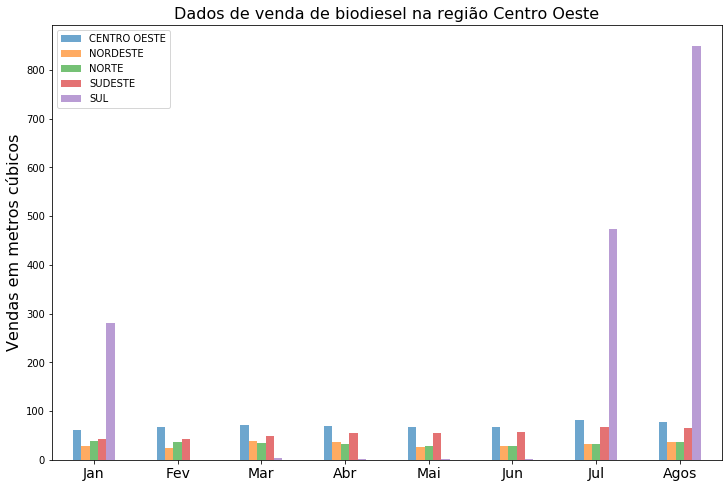

In [20]:
ax = df.plot(kind='bar', alpha=0.65, figsize=(12,8))
ax.set_title('Dados de venda de biodiesel na região {}'.format(regiao.title()), size=16) #lembra que defini a varíavel regiao em outra célula
ax.set_ylabel('Vendas em metros cúbicos', size=16)

# Aqui eu estou forçando o valor do label do x, porque a função que lê os dados não dar a informação dos meses. Resolveremos isto depois.
ax.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Agos'], rotation=0, size=14)

Quando analisamos os dados na prática em muitos momentos é interessante termos um quadro de como os dados são e assim conseguir algum insight.

Este quadro que vamos tentar criar abaixo.

In [21]:
# Vou nomear a minha indexação porque quando eu realizar o plot ficará mais fácil para tornar o gráfico inteligível.
df.index = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago']

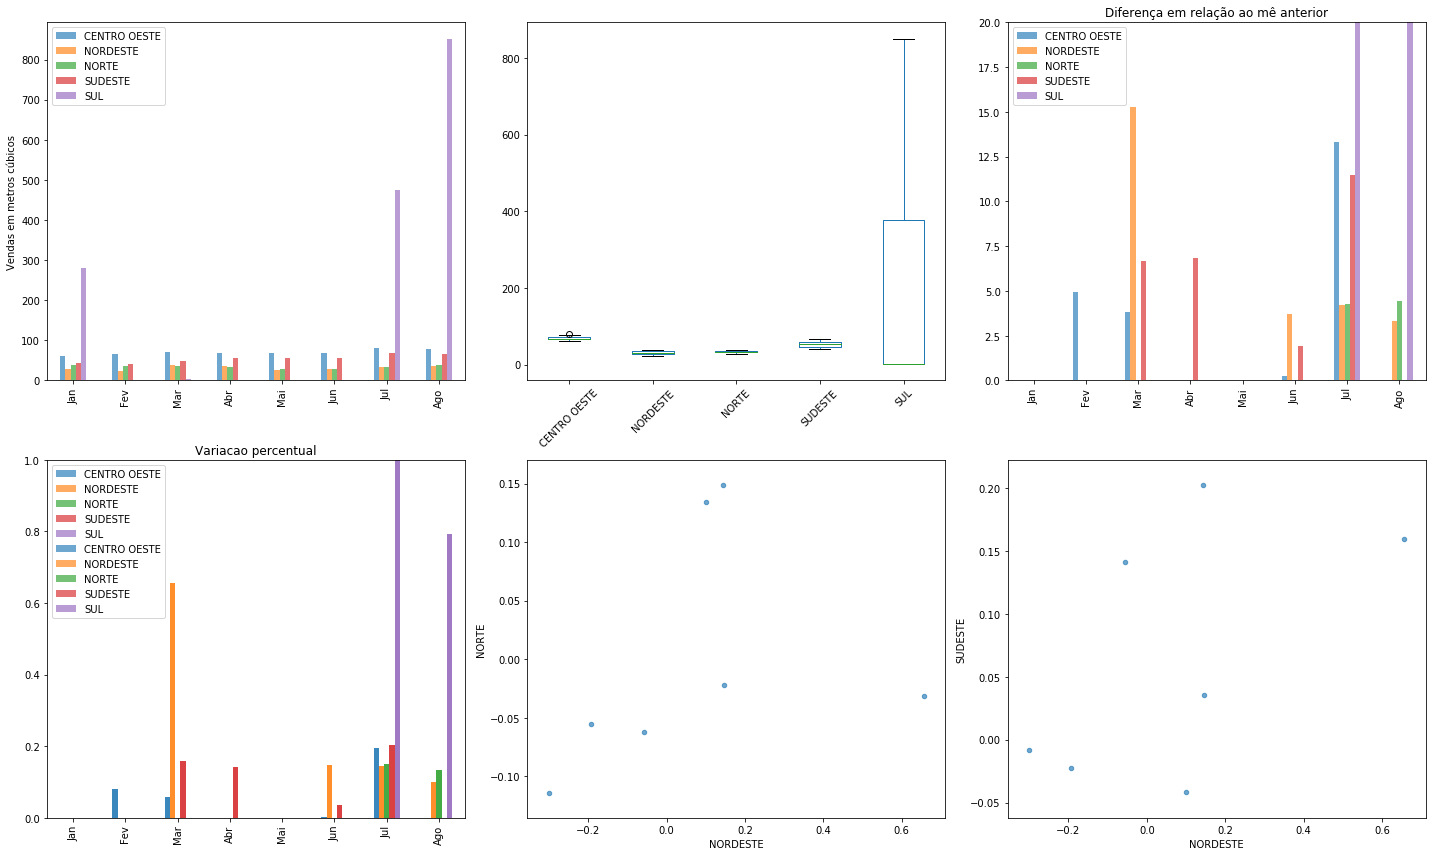

In [22]:
# Quando 
f, ax = plt.subplots(2, 3, figsize=(20,12), tight_layout=True)

# Gráfico 0, 0
df.plot(kind='bar', alpha=0.65, ax= ax[0, 0])
# ax[0, 0].set_title('Dados de venda de biodiesel na região {}'.format(regiao.title()), size=16) #lembra que defini a varíavel regiao em outra célula
ax[0, 0].set_ylabel('Vendas em metros cúbicos')

# Gráfico 0, 1
df.plot(kind='box',  ax= ax[0, 1])
xticklabels = ax[0, 1].get_xticklabels()
ax[0, 1].set_xticklabels(xticklabels, rotation=45) 

# Gráfico 0, 2
df.diff().plot(kind='bar', alpha=0.65, ax= ax[0, 2])
# xticklabels = ax[0, 2].get_xticklabels()
# ax[0, 2].set_xticklabels(xticklabels, rotation=45)
ax[0, 2].set_ylim(0, 20)
ax[0, 2].set_title('Diferença em relação ao mê anterior')

# Gráfico 1, 0
df.pct_change().plot(kind='bar', alpha=0.65, ax= ax[1, 0])
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_title('Variacao percentual')


# Gráfico 1, 0
df.pct_change().plot(kind='bar', alpha=0.65, ax= ax[1, 0])
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_title('Variacao percentual')

# Gráfico 1, 1
regiaoA = 'NORDESTE'
regiaoB = 'NORTE'
df.pct_change().plot(x= regiaoA, y=regiaoB, kind='scatter', alpha=0.65, ax= ax[1, 1])


# Gráfico 1, 2
regiaoA = 'NORDESTE'
regiaoB = 'SUDESTE'
df.pct_change().plot(x= regiaoA, y=regiaoB, kind='scatter', alpha=0.65, ax= ax[1, 2])



#### Exercício do dia

Criar uma função que receba o dataframe df e automáticamente crie a gráfico acima

In [23]:
def analise_dados(df):
    """
    recebe o df e transformar em gráficos.
    """
    
#     Tratar o dataframe


# Criar a figuras    
    f, ax = plt.subplots(2, 3, figsize=(8,8))
    
#     plotar em cada axes uma coluna do dataframe
    
    return f, ax
    